In [1]:
import tushare as ts
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import talib

df=ts.get_k_data('002460')
df['MA10_rolling'] = pd.rolling_mean(df['close'],10)
close = [float(x) for x in df['close']]
# 调用talib计算10日移动平均线的值
df['MA10_talib'] = talib.MA(np.array(close), timeperiod=10) 
df.tail(12)
plt.plot(df['MA10_talib'])
plt.show()

AttributeError: module 'pandas' has no attribute 'rolling_mean'

在Ta-lib的library中，计算平均移动均线的指标叫做SMA (simple moving average)
Ta-lib的语法总结起来，就是array in, array out
function中的第一个参数close是一个数组序列，可以想象成是一个股票很长一段时间以来的收市价的曲线。计算结果avg也是一个数组序列，因为她也是一条曲线，假设我们的close数组中共有最近100天的收市价，我们现在要计算这只股票30天的移动平均线。avg这条移动平均线上共有71个点，因为从第30天开始才能计算30天均值。我们能获得的，是包括今天在内的总共71天的30天平均值

如果我们要获得最近一天(今天）的移动平均值，就是获取avg这条曲线上的最后一个点，相当于数列中的最后一个值。昨天的平均值就是数列中的倒数第二个点，以此类推。


[29.27, 27.795, 27.425, 27.643, 28.43, 28.391, 28.113, 27.524, 25.976, 26.062, 26.307, 24.68, 25.368, 25.619, 26.142, 25.566, 27.775, 27.815, 28.278, 28.503, 28.192, 29.469, 29.105, 28.391, 28.893, 31.043, 30.494, 30.878, 30.573, 30.593, 30.891, 30.487, 32.214, 32.452, 33.67, 33.259, 32.298, 34.26, 33.929, 34.201, 34.545, 35.122, 36.268, 38.588, 42.22, 40.563, 41.08, 41.094, 39.887, 43.413, 44.481, 44.931, 45.574, 45.057, 42.114, 42.664, 41.531, 42.545, 42.32, 41.16, 45.276, 46.071, 45.322, 45.263, 43.712, 44.076, 46.721, 46.489, 48.669, 49.246, 48.318, 49.16, 50.605, 53.157, 53.117, 58.426, 59.983, 59.201, 61.68, 66.28, 61.176, 63.012, 59.619, 59.486, 59.559, 57.916, 58.598, 58.088, 55.244, 56.371, 56.948, 61.375, 60.613, 57.862, 58.128, 55.808, 57.438, 56.292, 57.644, 59.466, 57.558, 56.51, 57.717, 60.62, 60.116, 61.031, 58.26, 57.703, 56.61, 55.96, 58.068, 57.862, 57.2, 57.737, 57.001, 56.557, 57.988, 56.935, 56.457, 54.403, 51.122, 47.768, 47.284, 45.667, 48.378, 48.298, 48.444, 48

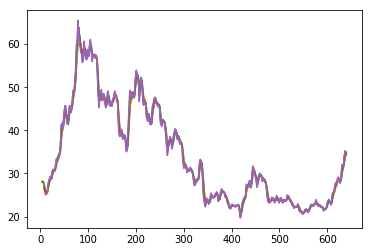

In [3]:
import tushare as ts
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import talib

df=ts.get_k_data('002460')
close = [float(x) for x in df['close']]
print(close)
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
avg = talib.SMA(np.array(close), timeperiod=30)
today_mavg = avg[-1]
ystd_mavg = avg[-2]

# MA_Type: 0=SMA, 1=EMA, 2=WMA, 3=DEMA, 4=TEMA, 5=TRIMA, 6=KAMA, 7=MAMA, 8=T3 (Default=SMA)

SMA = talib.MA(np.array(close),timeperiod=5,matype=0)
EMA = talib.MA(np.array(close),timeperiod=5,matype=1)
WMA = talib.MA(np.array(close),timeperiod=5,matype=2)
DEMA = talib.MA(np.array(close),timeperiod=5,matype=3)
TEMA = talib.MA(np.array(close),timeperiod=5,matype=4)

plt.plot(SMA)
plt.plot(EMA)
plt.plot(WMA)
plt.plot(DEMA)
plt.plot(TEMA) 
plt.show()

均线有很多不同的计算方法，比如EMA(指数移动平均值）和WMA(加权移动平均值）他们在计算均值时相对均会把更多的权重放在较近的日期，因此会比普通均线更灵敏，更能捕捉到市场的变化。那么我们如何选择到底要使用哪种均线呢？

Ta-lib考虑到这点，专门设计了matype这个变量，用数字代表均线计算方式，可以涵盖多种均线的计算方法。我们画出来看看。